In [1]:
import torch.nn as nn
import  image_loader as il
import visualize as vs
import gain as gn
from torchvision import models
from torch.utils.data import DataLoader

/home/nikita/anaconda3/envs/ml-diplom/lib/python3.7/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [2]:
alex = models.alexnet(pretrained=True)
print(alex)
num_features = alex.classifier[6].in_features
alex.classifier[6] = nn.Linear(num_features, 5) # output labels
last_registred_layer= "features.10"

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
loader = il.DatasetLoader.initial()
train = loader.load_tensors(0, 150)
test = loader.load_tensors(400, 450)

train_set = DataLoader(il.ImageDataset(train), batch_size=1, shuffle=True, num_workers=4)
test_set = DataLoader(il.ImageDataset(test), batch_size=1, shuffle=True, num_workers=4)

In [11]:
gain_network = gn.GAIN(alex, last_registred_layer, gpu=True)

current_model, best_model_w = gain_network.train(train_set, 20)

/home/nikita/anaconda3/envs/ml-diplom/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


End epoch: 1/21
Total Loss: 6987.128046365579, classification loss: 0.14377092266082764, loss AM: 0.0734393709897995, loss segments: 6.986910840352376
End epoch: 2/21
Total Loss: 7088.924493295908, classification loss: 0.14439370115598044, loss AM: 0.07437333766619364, loss segments: 7.088705729166667
End epoch: 3/21
Total Loss: 7104.329126286507, classification loss: 0.14334327952067058, loss AM: 0.07402841794490814, loss segments: 7.104111754099528
End epoch: 4/21
Total Loss: 6780.664990206083, classification loss: 0.14321135067939758, loss AM: 0.07443091948827107, loss segments: 6.780447338740031
End epoch: 5/21
Total Loss: 6837.064704419136, classification loss: 0.1438551145394643, loss AM: 0.07379587904612224, loss segments: 6.836847112019857
End epoch: 6/21
Total Loss: 6849.431984780471, classification loss: 0.14377526354789733, loss AM: 0.07364690911769867, loss segments: 6.849214505513509
End epoch: 7/21
Total Loss: 7061.226765131792, classification loss: 0.14376862510045368, l

In [6]:
def visualize_trained_model(m, data_set, elements):
    m.eval()
    for idx, (inputs, segments, labels) in enumerate(data_set):
        if idx > elements:
            continue
        inputs = inputs[0].to('cuda')
        labels = labels[0].to('cuda')
        segments = segments[0].to('cuda')
        _, _, _, _, a_c, t_a_c, i_start = gain_network.forward(m, inputs, segments, labels)
        a_c = a_c.cpu()
        i_start = i_start.cpu()
        inputs = inputs.cpu()
        vs.visualize_tensor(a_c, inputs)
        vs.visualize_tensor(t_a_c, inputs)
        vs.visualize_tensor(i_start, inputs)
        vs.visualize_tensor(segments, inputs)

last model:
train set:


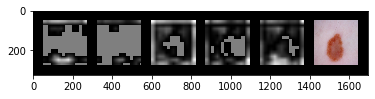

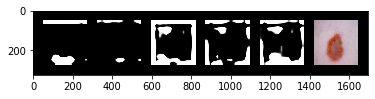

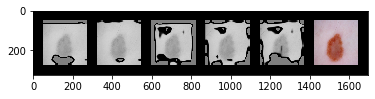

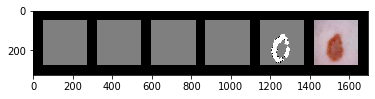

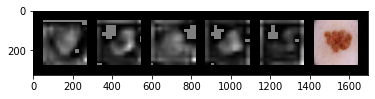

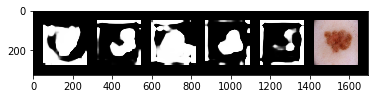

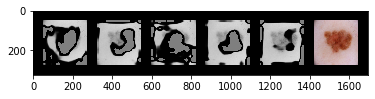

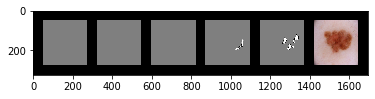

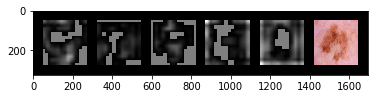

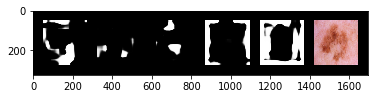

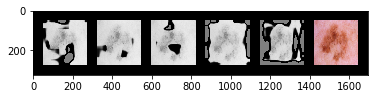

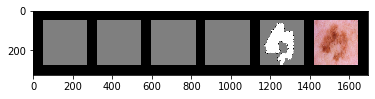

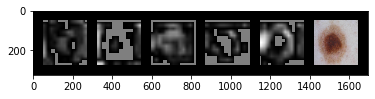

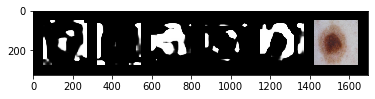

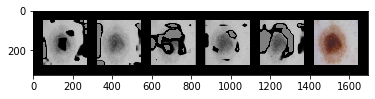

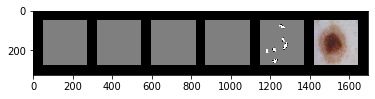

<Figure size 432x288 with 0 Axes>

In [12]:
print("=" * 20)
print("=" * 20)
print("last model:")
print("train set:")
visualize_trained_model(current_model, train_set, 3)

last model:
test set:


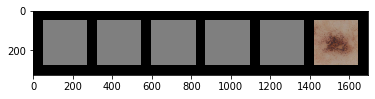

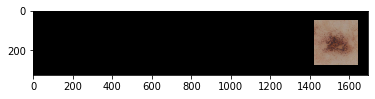

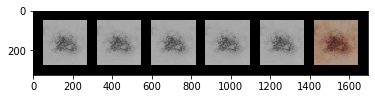

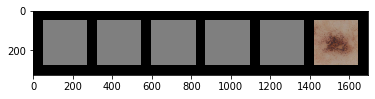

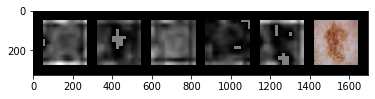

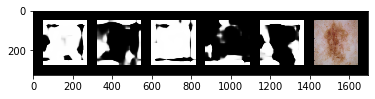

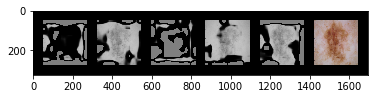

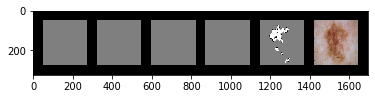

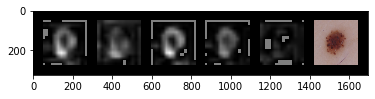

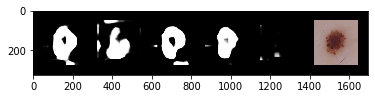

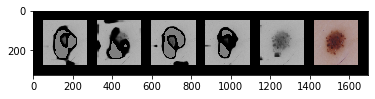

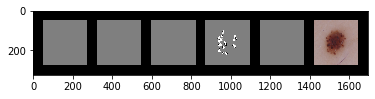

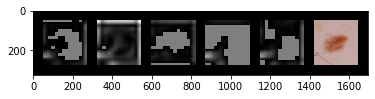

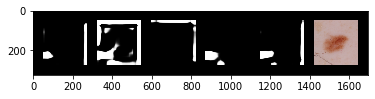

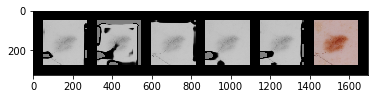

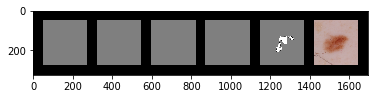

<Figure size 432x288 with 0 Axes>

In [13]:
print("=" * 20)
print("=" * 20)
print("last model:")
print("test set:")
visualize_trained_model(current_model, test_set, 3)

In [14]:
alex.load_state_dict(best_model_w)

<All keys matched successfully>

best model:
train set:


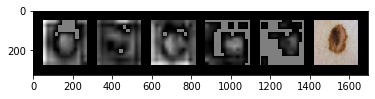

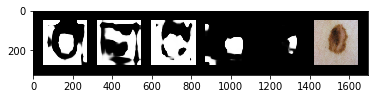

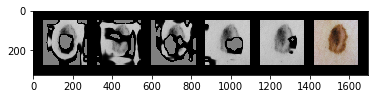

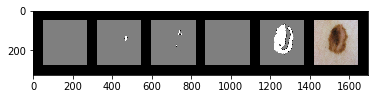

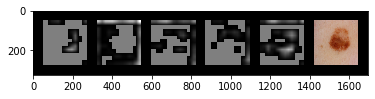

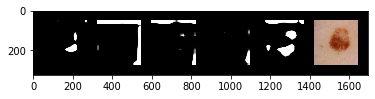

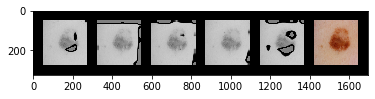

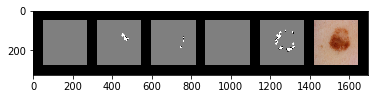

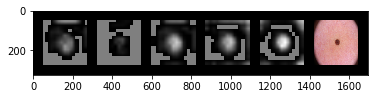

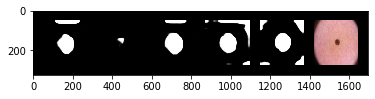

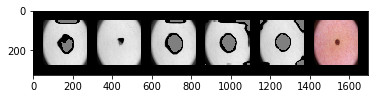

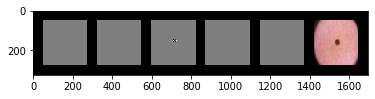

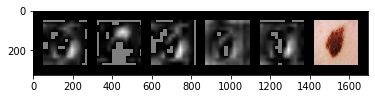

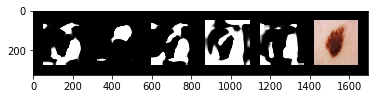

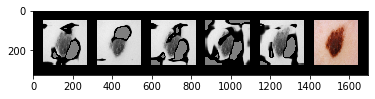

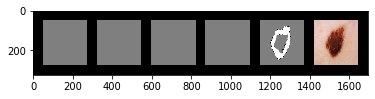

<Figure size 432x288 with 0 Axes>

In [15]:
print("=" * 20)
print("=" * 20)
print("best model:")
print("train set:")
visualize_trained_model(alex, train_set, 3)

best model:
test set:


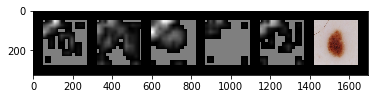

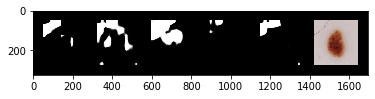

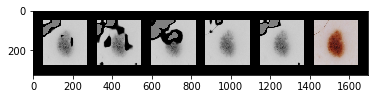

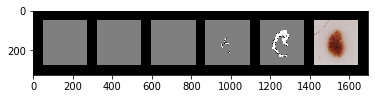

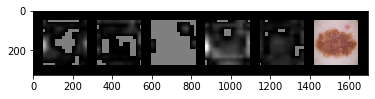

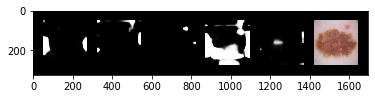

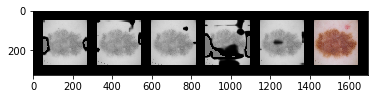

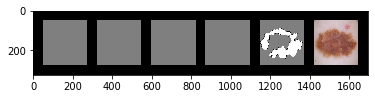

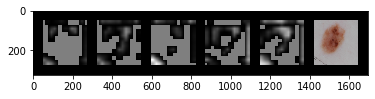

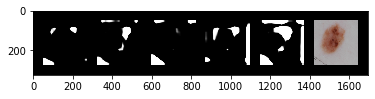

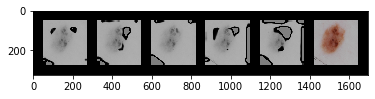

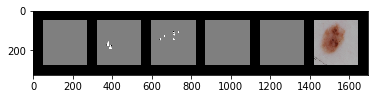

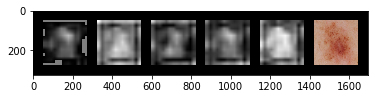

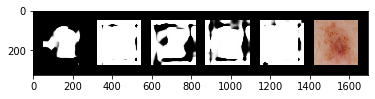

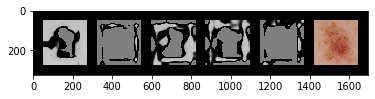

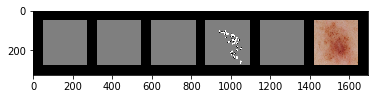

<Figure size 432x288 with 0 Axes>

In [16]:
print("=" * 20)
print("=" * 20)
print("best model:")
print("test set:")
visualize_trained_model(alex, test_set, 3)